![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Exercise 3 - Brain Computer Interface (BCI)</center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/Exercises/MainExerciseBCI.ipynb)

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size' : 16})
# np.random.seed(1)

### Load and plot the BCI data:
**Data sets 2a**  
http://www.bbci.de/competition/iv/#dataset2a

In [3]:
from scipy.io import loadmat

#-- Load the data:
lSubject = loadmat('BCI_Data.mat')['dSubject'][0]

#-- The possible labels:
lLabel = ['Left hand', 'Right hand', 'Foot', 'Tongue']

#-- Number of subjects:
Ns = len(lSubject)
print(f'Number of subjects: {Ns}')

Number of subjects: 5


##### Get subject data by the index
`idx` should be between `0` and `Ns`. .  
For this exercise, set `idx = 1`.

In [4]:
def GetSubjectData(idx):
    mX  = lSubject[idx][0][0].copy()
    mX  = np.transpose(mX, [2, 0, 1])
    vY  = lSubject[idx][0][1].squeeze().copy()
    vY -= 1
    
    return mX, vY

mX, vY = GetSubjectData(1)

mX.shape, vY.shape

((288, 1000, 22), (288,))

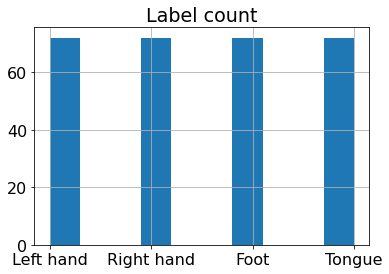

In [5]:
plt.hist(vY)
plt.xticks(range(4), lLabel)
plt.title('Label count')
plt.grid()
plt.show()

Plot a **single** sample:

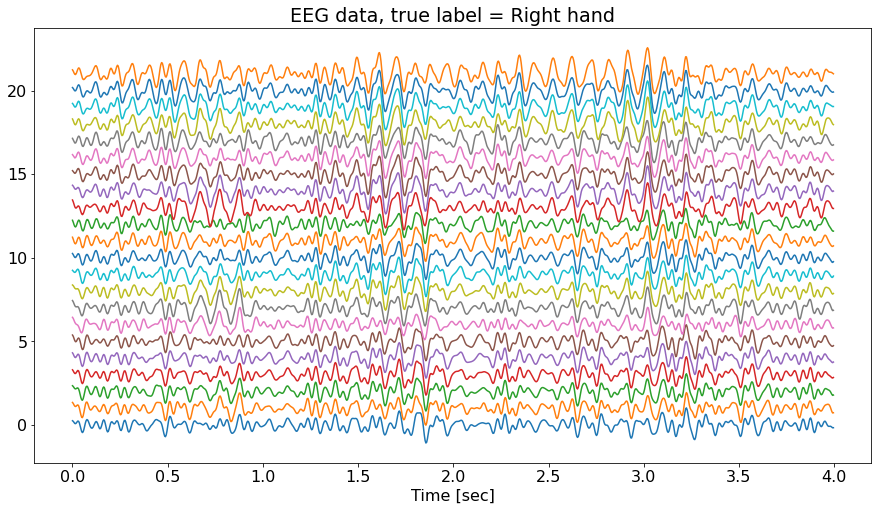

In [6]:
N, d, C = mX.shape

def PlotSample():
    idx  = np.random.randint(N)
    mXi  = mX[idx,:,:]
    yi   = vY[idx]
    
    #--  Just for plotting:
    mXi -= mXi.mean(0)
#     mXi /= 4 * mXi.std(0)
    mXi /= 20
    mXi += range(22)
    vT   = np.linspace(0, 4, d, endpoint=False)
    
    plt.figure(figsize=(15, 8))
    plt.plot(vT, mXi)
    plt.title(f'EEG data, true label = {lLabel[yi]}')
    plt.xlabel('Time [sec]')

PlotSample()
plt.show()

### Exercise 1
* Get above 30% accuracy (with leave-one-out cross validation).

In [8]:
#-- Your code:
???

Object `?` not found.


### Exercise 2
Apply the following steps:
1. For each sample $\boldsymbol{X}_{i}\in\mathbb{R}^{1000\times22}$, compute the covariance matrix $\boldsymbol{C}_{i}\in\mathbb{R}^{22\times22}$ (use `np.cov`).
2. Set $\boldsymbol{c}_{i}\in\mathbb{R}^{22^{2}}$ as the columns tack version of each $\boldsymbol{C}_{i}\in\mathbb{R}^{22\times22}$ (use `np.reshape`).
3. For visualization, apply dimensionality reduction (color each point according to the label `vY`):
    * PCA
    * MDS
    * t-SNE
    * UMAP
4. Using $\boldsymbol{c}_{i}$, get above 58% accuracy.

In [11]:
#-- Your code:
???

Object `?` not found.


### Exercise 3
`SpdMetric` is a useful metric between two covariance matrices:
$$d\left(\boldsymbol{C}_{i},\boldsymbol{C}_{j}\right)=\sqrt{\sum_{i=1}^{d}\log^{2}\left(\lambda_{i}\left(\boldsymbol{C}_{i}^{-1}\boldsymbol{C}_{j}\right)\right)}$$

1. Implement the function `SpdMetricAux` below.    
The function gets the vectors $\boldsymbol{c}_{i}$ and $\boldsymbol{c}_{j}$.  
It reshapes them back to the two matrices $\boldsymbol{C}_{i}$ and $\boldsymbol{C}_{j}$ and returns $d\left(\boldsymbol{C}_{i},\boldsymbol{C}_{j}\right)$
2. Apply dimensionality reduction using the new metric:
    * MDS
    * t-SNE
    * UMAP
3. Get above 85% accuracy!

In [16]:
from scipy.linalg import eigvalsh

def SpdMetric(mC1, mC2):
    
    vEig = eigvalsh(mC1, mC2)
    return np.sqrt(np.sum(np.log(vEig)**2))

In [17]:
def SpdMetricAux(vC1, vC2):
    ???